In [2]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

## Image conversion

First, we need to convert the images into an array format that can easily be readable by Python. To do that, we will use the mpimg.imread function in the numpy library. Each image is a 100 x 100 x 3 array, representing 100 pixels long, 100 pixels wide, and 3 RGB color channels. We also read in the .csv file containing the unique ID for each image, their title, a brief description, and the classification label to which they belong to.

In [3]:
#Set working directory:
os.chdir('C:\\Users\\seanx\\OneDrive\\Desktop\\YORK ML\\ML1020\\Retail products classification\\retail-products-classification')
df_train = pd.read_csv('train.csv')
df_train.head()

,ImgId,title,description,categories
0,B000HYL1V6,TUNGSTEN SOLDER PICK WITH HANDLE,Solder Pick for picking up molten solder when ...,"Arts, Crafts & Sewing"
1,B00006HXWY,Write Right 98167 Screen Protector for Sony T615C,We all screen. And we all need to protect thos...,Cell Phones & Accessories
2,B000GAWSBS,Casio Mens DBC310-1 Databank 300 Digital Watch...,"Bringing you precision at a glance, the Casio ...","Clothing, Shoes & Jewelry"
3,B000040JOL,Factory-Reconditioned DEWALT DW260KR Heavy-Dut...,Factory-Reconditioned DEWALT DW260KR Heavy-Dut...,Tools & Home Improvement
4,B00006IB78,Energizer 2 in 1 Light,This twoway light features a bright flashlight...,Health & Personal Care


In [4]:
df_train.shape

(52596, 4)

In [12]:
train_path = 'C:\\Users\\seanx\\OneDrive\\Desktop\\YORK ML\\ML1020\\Retail products classification\\retail-products-classification\\train\\train'
train_images = os.listdir(train_path)
os.chdir(train_path)
print('Number of training images: ', len(train_images))

Number of training images:  52567


In [13]:
#There is a difference in number of images between df_train and the actual number of images on file, so subset df_train by the images on file
train_images_ID = [img[:-4] for img in train_images]
df_train = df_train[df_train['ImgId'].isin(train_images_ID)]
df_train.shape

(52567, 4)

In [14]:
def img_to_array(image_file):
    array_list = []
    for i in range(len(image_file)):
        train_img = mpimg.imread(image_file[i])
        array_list.append(train_img)
    return(array_list)

In [15]:
array_list = []
for i in range(len(df_train['ImgId'][0:100])):
    array_list.append(mpimg.imread(df_train['ImgId'].iloc[i]+'.jpg'))

In [17]:
df_train = df_train.iloc[0:100]
df_train['array'] = array_list

C:\Users\seanx\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [20]:
x_train = df_train['array']
x_train_dimensions = []
for i in range(len(x_train)):
    x_train_dimensions.append(x_train[i].shape)
df_train['shape'] = x_train_dimensions
pd.Series(x_train_dimensions).value_counts()

(100, 100, 3)    97
(100, 100)        3
dtype: int64

In [21]:
#There are around ~1000 images that do not have a RGB channel. let's take a look at what they are
df_100shape = df_train[df_train['shape']==(100,100)]

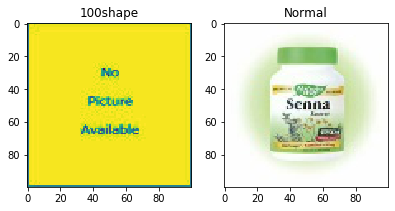

In [27]:
#Some of these images do not have RGB channel like others - so we will remove them

os.chdir(train_path)
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(1, 3, 1)
imgplot = plt.imshow(mpimg.imread(df_100shape['ImgId'].iloc[np.random.randint(len(df_100shape))]+'.jpg'))
ax.set_title('100shape')
ax = fig.add_subplot(1, 3, 2)
imgplot = plt.imshow(mpimg.imread(df_train['ImgId'].iloc[np.random.randint(len(df_train))]+'.jpg'))
ax.set_title('Normal')

df = df_train[df_train['shape']!=(100,100)]

In [129]:
#Saving/loading file
os.chdir('C:\\Users\\seanx\\OneDrive\\Desktop\\YORK ML\\ML1020\\Retail products classification\\retail-products-classification')
df.to_csv('df_clean.csv', index=False)
np.save('np_img_array', list(df['array']))

In [24]:
#Loading file
os.chdir('C:\\Users\\seanx\\OneDrive\\Desktop\\YORK ML\\ML1020\\Retail products classification\\retail-products-classification')
df = pd.read_csv('df_clean.csv')
df['array'] = list(np.load('np_img_array.npy'))

## Exploratory Data Analysis

Next, we will explore the distribution of each label, as well as examples of each label.

In [5]:
df['categories'].value_counts()

Electronics                  2596
Patio, Lawn & Garden         2500
Appliances                   2500
Clothing, Shoes & Jewelry    2500
Beauty                       2500
Cell Phones & Accessories    2500
Arts, Crafts & Sewing        2500
All Electronics              2500
Pet Supplies                 2500
Toys & Games                 2500
Baby Products                2500
Industrial & Scientific      2500
Baby                         2500
Grocery & Gourmet Food       2500
Health & Personal Care       2500
Tools & Home Improvement     2500
Sports & Outdoors            2500
Office Products              2500
All Beauty                   2500
Automotive                   2500
Musical Instruments          2500
Name: categories, dtype: int64

In [6]:
#plot a random image from each category and the title:
train_path = 'C:\\Users\\seanx\\OneDrive\\Desktop\\YORK ML\\ML1020\\Retail products classification\\retail-products-classification\\train\\train'
os.chdir(train_path)
categories = df['categories'].unique()
df_grouped = df.groupby(df['categories'])
i = 0
plt.figure(figsize=(200,200))
for category in categories:
    df_cat = df_grouped.get_group(category)['array']
    randint = np.random.randint(len(df_cat))
    image = df_cat.iloc[randint]
    plt.subplot(1, len(categories), i+1)
    plt.title(category, fontdict={'fontsize': 30})
    plt.axis('off')
    plt.imshow(image)
    
    i = i+1

NameError: name 'df' is not defined

## Baseline Model

First, the data was split into train/test, normalized, and trained using a CNN model architecture. After training for 5 epochs, the accuracy 

In [26]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

X = list(df['array'])
le = LabelEncoder()
le.fit(df['categories'])
y = list(le.transform(df['categories']))

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [5]:
#normalize X
X_train = np.array(X_train)/255
X_test = np.array(X_test)/255

In [6]:
print(X_train.shape, X_test.shape)

(35987, 100, 100, 3) (15423, 100, 100, 3)


In [7]:
import keras
num_classes = 21
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

Using TensorFlow backend.
C:\Users\seanx\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\seanx\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\seanx\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\seanx\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py

In [138]:
#Train our own model
from keras.models import Sequential
from keras.layers import(Dense, Conv2D, MaxPool2D, Flatten, Dropout, BatchNormalization)

model = Sequential() 
model.add(Conv2D(75, (3, 3), strides=1, padding="same", activation="relu", input_shape=(100, 100, 3))) 
model.add(BatchNormalization()) 
model.add(MaxPool2D((2, 2), strides=2, padding="same")) 
model.add(Conv2D(50, (3, 3), strides=1, padding="same", activation="relu")) 
model.add(Dropout(0.2)) 
model.add(BatchNormalization()) 
model.add(MaxPool2D((2, 2), strides=2, padding="same")) 
model.add(Conv2D(25, (3, 3), strides=1, padding="same", activation="relu")) 
model.add(BatchNormalization()) 
model.add(MaxPool2D((2, 2), strides=2, padding="same")) 
model.add(Flatten()) 
model.add(Dense(units=512, activation="relu")) 
model.add(Dropout(0.3)) 
model.add(Dense(units=num_classes, activation="softmax"))

In [139]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 100, 100, 75)      2100      
_________________________________________________________________
batch_normalization_1 (Batch (None, 100, 100, 75)      300       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 50, 50, 75)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 50, 50, 50)        33800     
_________________________________________________________________
dropout_1 (Dropout)          (None, 50, 50, 50)        0         
_________________________________________________________________
batch_normalization_2 (Batch (None, 50, 50, 50)        200       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 25, 25, 50)       

In [140]:
model.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer='adam')

In [ ]:
model.fit(X_train, y_train, epochs=5, verbose=1, validation_data=(X_test,y_test))

In [ ]:
#RESULTS: in Google Colab, training for 5 epochs, got accuracy of ~5%. Lots of work to be done for the baseline model

## Pretrained model

Let's first use pretrained model to see if it can identify what our products are

In [7]:
from tensorflow.keras.applications import VGG16
model = VGG16(weights="imagenet")

In [6]:
model.summary()

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0     

In [51]:
from keras.applications.vgg16 import preprocess_input
from keras.preprocessing import image as image_utils

def load_and_process_images(image_path):
    image = image_utils.load_img(image_path, target_size=(224,224))
    plt.imshow(image)
    image = image_utils.img_to_array(image)
    image = image.reshape(1, 224, 224, 3)
    image = preprocess_input(image)
    return image

In [52]:
from keras.applications.vgg16 import decode_predictions

def readable_prediction(df):
    image = load_and_process_images(df['ImgId'] + '.jpg')
    predictions = model.predict(image)
    print('Predicted', decode_predictions(predictions, top = 3))
    print('Actual: ', df['title'], '\nCategory: ',df['categories'])

Predicted [[('n04039381', 'racket', 0.9590147), ('n04332243', 'strainer', 0.010408219), ('n04409515', 'tennis_ball', 0.008231796)]]
Actual:  Head Liquidmetal 4 Tennis Racquet 
Category:  Sports & Outdoors
33352


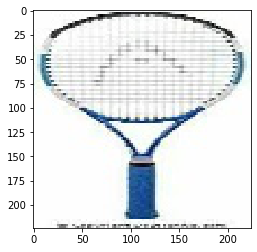

In [90]:
train_path = 'C:\\Users\\seanx\\OneDrive\\Desktop\\YORK ML\\ML1020\\Retail products classification\\retail-products-classification\\train\\train'
os.chdir(train_path)
randint = np.random.randint(len(df))
readable_prediction(df.iloc[randint])
print(randint)

## Transfer Learning

In [9]:
from tensorflow.keras.layers import Input
import keras

base_model = keras.applications.VGG16(weights = 'imagenet', input_shape = (100, 100, 3), include_top = False)

Using TensorFlow backend.


In [10]:
base_model.summary()

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_4 (InputLayer)         (None, 100, 100, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 100, 100, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 100, 100, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 50, 50, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 50, 50, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 50, 50, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 25, 25, 128)       0     

In [11]:
base_model.trainable = False

In [12]:
inputs = keras.Input(shape=(100, 100, 3))
x = base_model(inputs)
x = keras.layers.GlobalAveragePooling2D()(x)
outputs = keras.layers.Dense(21)(x)
model2 = keras.Model(inputs, outputs)

In [12]:
model2.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         (None, 100, 100, 3)       0         
_________________________________________________________________
vgg16 (Model)                (None, 3, 3, 512)         14714688  
_________________________________________________________________
global_average_pooling2d_1 ( (None, 512)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 21)                10773     
Total params: 14,725,461
Trainable params: 10,773
Non-trainable params: 14,714,688
_________________________________________________________________


In [13]:
#Manually calculate metrics
'''
from keras import backend as K

def recall_m(y_true, y_pred):
/
    possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
    recall = true_positives / (possible_positives + K.epsilon())
    return recall

def precision_m(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
    precision = true_positives / (predicted_positives + K.epsilon())
    return precision

def f1_m(y_true, y_pred):
    precision = precision_m(y_true, y_pred)
    recall = recall_m(y_true, y_pred)
    return 2*((precision*recall)/(precision+recall+K.epsilon()))
'''
# compile the model
model2.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [14]:
model2.fit(X_train[0:500], y_train[0:500], steps_per_epoch = 12, validation_data = (X_test[0:100], y_test[0:100]), validation_steps = 4, epochs = 5, verbose = 2)

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where

Train on 500 samples, validate on 100 samples
Epoch 1/5
 - 292s - loss: 1.3855 - accuracy: 0.5056 - val_loss: 0.1835 - val_accuracy: 2.1276
Epoch 2/5
 - 309s - loss: 0.6360 - accuracy: 0.5488 - val_loss: 0.1525 - val_accuracy: 2.0838
Epoch 3/5
 - 316s - loss: 0.5969 - accuracy: 0.5335 - val_loss: 0.1549 - val_accuracy: 1.9981
Epoch 4/5
 - 310s - loss: 0.5894 - accuracy: 0.5268 - val_loss: 0.1573 - val_accuracy: 1.9867
Epoch 5/5
 - 319s - loss: 0.5782 - accuracy: 0.5336 - val_loss: 0.1585 - val_accuracy: 2.0133


In [53]:
from keras.applications.vgg16 import preprocess_input

def predict_custom(df):
    plt.imshow(df['array'])
    image = preprocess_input(df['array'].reshape(1, 100, 100, 3))
    prediction = model2.predict(image)
    predicted = list(le.classes_)[np.argmax(prediction)]
    actual = df['categories']
    print('Predicted: ', predicted)
    print('Actual: ', df['title'], '\nCategory: ', actual)
    return(predicted == actual)

Predicted:  Baby Products
Actual:  Epi-Soothe Cream Rinse/Conditioner Itch Relief Cats/Dogs, 16 oz 
Category:  Pet Supplies


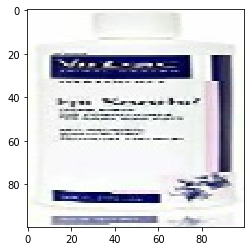

In [68]:
randint = np.random.randint(len(df))
predict_custom(df.iloc[randint])

In [42]:
#Next try differentiating between just 2 classes, then do transfer learning on that. Not sure how well this works...
df_for_transfer = df[df['categories'].isin(['Cell Phones & Accessories', 'Baby'])]
df_for_transfer.head()

,ImgId,title,description,categories,array,shape,ImgId_filepath
1,B00006HXWY,Write Right 98167 Screen Protector for Sony T615C,We all screen. And we all need to protect thos...,Cell Phones & Accessories,"[[[255, 255, 248], [254, 253, 249], [255, 254,...","(100, 100, 3)",B00006HXWY.jpg
7,B000EIEWCU,Inglesina Twin Swift,Light weight double stroller that is perfect f...,Baby,"[[[254, 254, 254], [254, 254, 254], [254, 254,...","(100, 100, 3)",B000EIEWCU.jpg
9,B000FTD1RA,DaVinci Elizabeth II Convertible Toddler Bed i...,This toddler bed is for your little king or qu...,Baby,"[[[254, 254, 254], [254, 254, 254], [254, 254,...","(100, 100, 3)",B000FTD1RA.jpg
12,B000BTECFE,Florida State University Accessory Cover - Mar...,Britax(R) is excited to announce the launch of...,Baby,"[[[255, 249, 255], [255, 250, 255], [255, 252,...","(100, 100, 3)",B000BTECFE.jpg
28,B0002HVYD8,"Kathe Kruse Terrycloth Baby, Blue/White",The Kathe&#xA0;Kruse Terrycloth Baby &#xA0;has...,Baby,"[[[254, 254, 254], [254, 254, 254], [254, 254,...","(100, 100, 3)",B0002HVYD8.jpg


In [43]:
df_for_transfer = df_for_transfer.sample(frac=1).reset_index(drop = True)
df_for_transfer.head()

,ImgId,title,description,categories,array,shape,ImgId_filepath
0,B0007W1CNK,Cosco Soria Stroller - Nathan,The Cosco Soria Stroller combines key features...,Baby,"[[[251, 251, 251], [251, 251, 251], [251, 251,...","(100, 100, 3)",B0007W1CNK.jpg
1,B000EE8XEM,The Rocket by Bumbleride in Cosmo,This Rocket is a sporty stroller that offers a...,Baby,"[[[254, 254, 254], [254, 254, 254], [254, 254,...","(100, 100, 3)",B000EE8XEM.jpg
2,B000G0HF16,HALO SleepSack Big Kids Micro-Fleece Wearable ...,NaN,Baby,"[[[254, 254, 254], [254, 254, 254], [254, 254,...","(100, 100, 3)",B000G0HF16.jpg
3,B0000A340H,"JJ Cole Original Infant Bundleme, Snow",The shearling inner lining of the New Original...,Baby,"[[[254, 254, 254], [254, 254, 254], [254, 254,...","(100, 100, 3)",B0000A340H.jpg
4,B00076Q2IG,Battery Biz Hi-Capacity B-7753 Lithium Ion Cel...,Battery for motorola v180 v220 c650 v150 and m...,Cell Phones & Accessories,"[[[254, 254, 254], [254, 254, 254], [254, 254,...","(100, 100, 3)",B00076Q2IG.jpg


In [18]:
#Binary classification might make it easier
import keras
from keras import Input

inputs = keras.Input(shape=(100, 100, 3))
x = base_model(inputs)
x = keras.layers.GlobalAveragePooling2D()(x)
outputs = keras.layers.Dense(2)(x)
model3 = keras.Model(inputs, outputs)

In [19]:
model3.summary()

Model: "model_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_7 (InputLayer)         (None, 100, 100, 3)       0         
_________________________________________________________________
vgg16 (Model)                (None, 3, 3, 512)         14714688  
_________________________________________________________________
global_average_pooling2d_3 ( (None, 512)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 2)                 1026      
Total params: 14,715,714
Trainable params: 1,026
Non-trainable params: 14,714,688
_________________________________________________________________


In [20]:
model3.compile(optimizer='adam', loss=keras.losses.BinaryCrossentropy(from_logits=True), metrics=[keras.metrics.BinaryAccuracy()])

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
X = list(df_for_transfer['array'])
le2 = LabelEncoder()
le2.fit(df_for_transfer['categories'])
y = list(le2.transform(df_for_transfer['categories']))


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
X_train = np.array(X_train)/255
X_test = np.array(X_test)/255
y_train = keras.utils.to_categorical(y_train, 2)
y_test = keras.utils.to_categorical(y_test, 2)

In [ ]:
model3.fit(X_train[0:500], y_train[0:500], steps_per_epoch = 12, validation_data = (X_test[0:100], y_test[0:100]), validation_steps = 4, epochs = 10, verbose = 2)

In [41]:
df_for_transfer.shape

(2477, 7)

In [92]:
def predict_custom(df):
    plt.imshow(df['array'])
    image = preprocess_input(df['array'].reshape(1, 100, 100, 3))
    prediction = model3.predict(image)
    predicted = list(le2.classes_)[np.argmax(prediction)]
    actual = df['categories']
    #print('Predicted: ', predicted)
    #print('Actual: ', df['title'], '\nCategory: ', actual)
    return(predicted == actual)

True

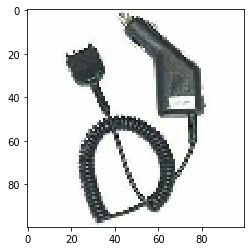

In [93]:
randint = np.random.randint(len(df_for_transfer))
predict_custom(df_for_transfer.iloc[randint])

20

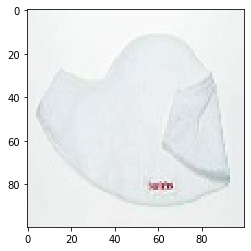

In [94]:
correct = 0
for _ in range(100):
    randint = np.random.randint(len(df_for_transfer))
    if predict_custom(df_for_transfer.iloc[randint]):
        correct += 1
correct

In [78]:
#Testing transfer learning with 500 images, no augmentation resulted in testing accuracy of ~80%

77

In [1]:
import tensorflow as tf
tf.__version__

'2.4.1'

In [104]:
#Image augmentation
new_model = tf.keras.models.load_model('custom_trained.h5')

def predict_custom2(df, model):
    plt.imshow(df['array'])
    image = df['array'].reshape(1, 100, 100, 3)
    prediction = model.predict(image)
    predicted = list(le.classes_)[np.argmax(prediction)]
    actual = df['categories']
    #print('Predicted: ', predicted)
    #print('Actual: ', df['title'], '\nCategory: ', actual)
    return(predicted == actual)

Predicted:  Patio, Lawn & Garden
Actual:  Fellowes 48129 Standard 16/17 IN Glare Filter Traditional Tint 
Category:  Electronics


False

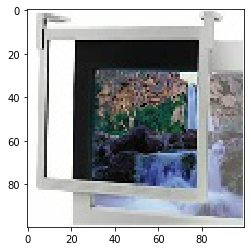

In [100]:
randint = np.random.randint(len(df))
predict_custom2(df.iloc[randint], new_model)

44

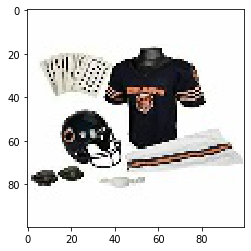

In [112]:
correct = 0
for _ in range(500):
    randint = np.random.randint(len(df))
    if predict_custom2(df.iloc[randint], new_model): correct +=1
correct

## Image Augmentation

In [114]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
datagen = ImageDataGenerator(samplewise_center=True, rotation_range=10, zoom_range=0.1,width_shift_range=0.1, height_shift_range=0.1, horizontal_flip=True, vertical_flip=False)